# Installing and Importing Packages

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
from scipy.signal import lfilter
import copy
from matplotlib import pyplot as plt

import shap

# Importing Data and creating Adstock Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fb_mmm_data.csv to fb_mmm_data.csv


In [ ]:
import io

data = pd.read_csv(io.BytesIO(uploaded['fb_mmm_data.csv']))

In [ ]:
data

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,...,jun,jul,aug,sept,oct,nov,new_years,mothers_day,fathers_day,christmas
0,11/23/2015,2754371.67,67075.04,0.0,38185.466670,7.290385e+07,0.00000,0,8125009,22821.398740,...,0,0,0,0,0,1,0,0,0,0
1,11/30/2015,2584276.67,85840.36,0.0,0.000000,1.658110e+07,29511.71546,12400,7901549,3425.857351,...,0,0,0,0,0,1,0,0,0,0
2,12/7/2015,2547386.67,0.00,396835.2,1361.600000,4.995477e+07,36132.35896,11360,8300197,12769.126130,...,0,0,0,0,0,0,0,0,0,0
3,12/14/2015,2875220.00,250350.92,0.0,53040.000000,3.164930e+07,36804.21096,12760,8122883,8401.472031,...,0,0,0,0,0,0,0,0,0,0
4,12/21/2015,2215953.33,0.00,832008.0,0.000000,8.802269e+06,28401.74407,10840,7105985,2068.747816,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,10/14/2019,2456240.00,0.00,96692.8,61489.466670,0.000000e+00,152840.32340,44840,7612762,0.000000,...,0,0,0,0,1,0,0,0,0,0
204,10/21/2019,2182825.00,61967.04,0.0,0.000000,5.688196e+07,103680.04780,41480,6701667,13362.457550,...,0,0,0,0,1,0,0,0,0,0
205,10/28/2019,2377706.67,8793.00,22550.4,6990.400000,0.000000e+00,138387.70410,45880,7688920,0.000000,...,0,0,0,0,1,0,0,0,0,0
206,11/4/2019,2732825.00,8981.20,0.0,9620.533333,0.000000e+00,151707.99050,53640,8815710,0.000000,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data_train = data[0:156]
data_test = data[156:]


data_train_X = data_train.drop(columns = ["DATE", "revenue"])
data_test_X = data_test.drop(columns = ["DATE", "revenue"])

data_train_y = data_train["revenue"]
data_test_y = data_test["revenue"]



In [ ]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# NN Model

Epoch 1/80
5/5 [==============================] - 1s 41ms/step - loss: 2925565575168.0000 - val_loss: 2258603868160.0000
Epoch 2/80
5/5 [==============================] - 0s 8ms/step - loss: 2470452396032.0000 - val_loss: 1901015334912.0000
Epoch 3/80
5/5 [==============================] - 0s 8ms/step - loss: 1646103363584.0000 - val_loss: 1754479198208.0000
Epoch 4/80
5/5 [==============================] - 0s 11ms/step - loss: 1296730816512.0000 - val_loss: 1428126564352.0000
Epoch 5/80
5/5 [==============================] - 0s 9ms/step - loss: 956739354624.0000 - val_loss: 1060596744192.0000
Epoch 6/80
5/5 [==============================] - 0s 10ms/step - loss: 794838237184.0000 - val_loss: 857205243904.0000
Epoch 7/80
5/5 [==============================] - 0s 14ms/step - loss: 549341364224.0000 - val_loss: 734421450752.0000
Epoch 8/80
5/5 [==============================] - 0s 15ms/step - loss: 482338111488.0000 - val_loss: 579096543232.0000
Epoch 9/80
5/5 [==========================

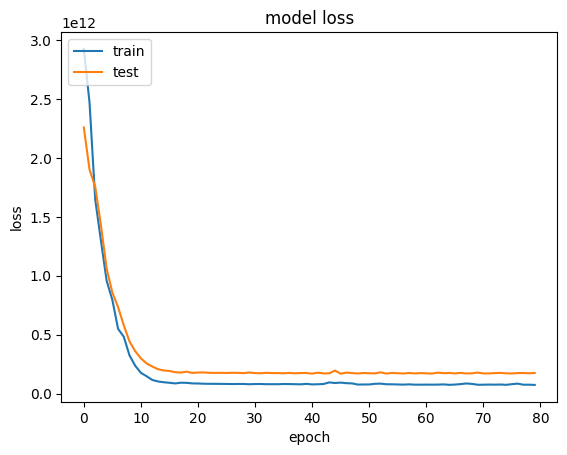

In [ ]:
np.random.seed(7)
tf.random.set_seed(7)

# Define the FNN model with L2 regularization
model = Sequential()
model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28,)))
model.add(Dense(units=1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

train_X, val_X, train_y, val_y = train_test_split(data_train_X, data_train_y, test_size=0.1, random_state=7)


# Train the model
train_result = model.fit(train_X, train_y, epochs=80, batch_size=32, validation_data=(val_X, val_y))

train_predictions = model.predict(train_X)
train_predictions1 = model.predict(data_train_X)
val_predictions = model.predict(val_X)
test_predictions = model.predict(data_test_X)
train_mape = mape(train_y , train_predictions.flatten())
val_mape = mape(val_y , val_predictions.flatten())
test_mape = mape(data_test_y , test_predictions.flatten() )
train_mse = mean_squared_error(train_y, train_predictions)
val_mse = mean_squared_error(val_y, val_predictions)
test_mse = mean_squared_error(data_test_y, test_predictions)


r2 = r2_score(train_y, train_predictions)
print("R^2:", r2)
print("Training MAPE:", train_mape)
print("Val MAPE:", val_mape)
print("Test MAPE:", test_mape)
print("")
print("Training MSE:", train_mse)
print("Val MSE:", val_mse)
print("Test MSE:", test_mse)

plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

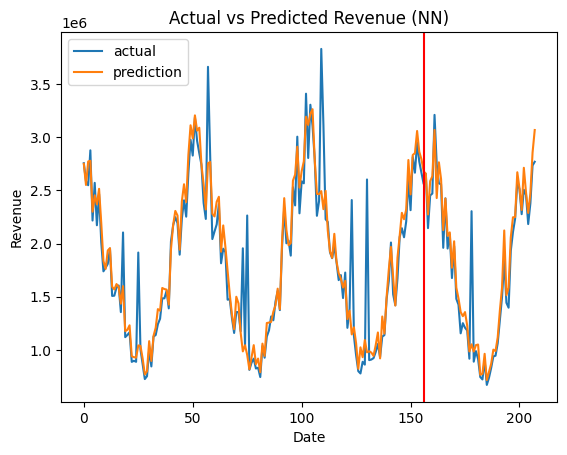

In [ ]:
all_act = np.append(data_train_y.to_numpy(),data_test_y.to_numpy())
all_pred = np.append(list(train_predictions1.flatten()),list(test_predictions.flatten()))

plt.plot(all_act)
plt.plot(all_pred)
plt.axvline(x = 156, color = 'r')
plt.title('Actual vs Predicted Revenue (NN)')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend(['actual', 'prediction'], loc='upper left')
plt.show()

numpy.ndarray

## Shapley Values / Contributions / ROI

In [ ]:
# Create an explainer object with the trained model and training data
explainer = shap.Explainer(model, data_train_X.values)

# Calculate Shapley values for a set of test data
shap_values = explainer(data_train_X.values)


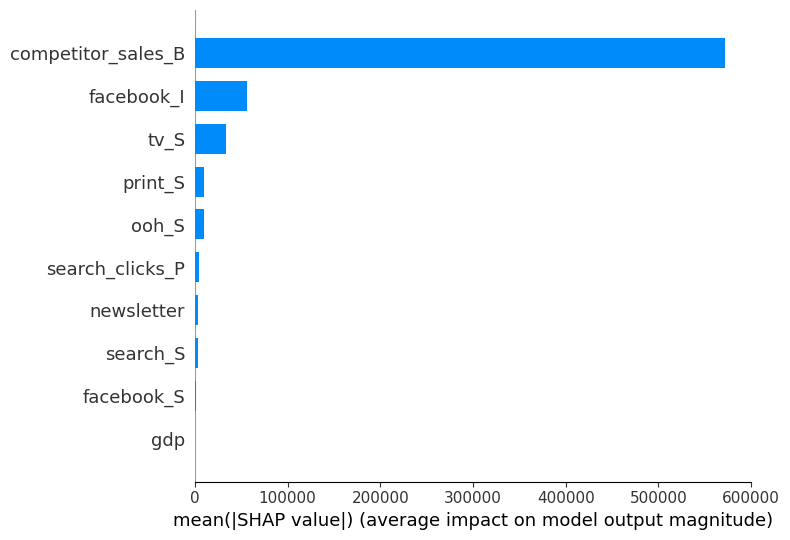

In [ ]:
# Plot the Shapley values
shap.summary_plot(shap_values, data_train_X, plot_type = "bar", feature_names = data_train_X.columns,  max_display=10)

In [ ]:
tv_shap = shap_values[0].values[0]
ooh_shap = shap_values[0].values[1]
print_shap = shap_values[0].values[2]
fb_shap = shap_values[0].values[3]+shap_values[0].values[7]
search_shap = shap_values[0].values[4]+shap_values[0].values[5]
total_shap = sum(shap_values[0].values)
media_shap = tv_shap + ooh_shap + print_shap + fb_shap + search_shap

search_click_shap = shap_values[0].values[5]


print("SHAP TV:",tv_shap)
print("SHAP OOH:",ooh_shap)
print("SHAP Print:",print_shap)
print("SHAP Facebook:",fb_shap)
print("SHAP Search:",search_shap)

print("")

print("TV % Contribution:",tv_shap/total_shap*100)
print("OOH % Contribution:",ooh_shap/total_shap*100)
print("Print % Contribution:", print_shap/total_shap*100)
print("Facebook % Contribution:",fb_shap/total_shap*100)
print("Search % Contribution:",search_shap/total_shap*100)
print("")

print("Total Media % Contribution:", media_shap/total_shap*100)

SHAP TV: 6749.33999999998
SHAP OOH: -12498.582430555589
SHAP Print: 14844.044583333332
SHAP Facebook: 79714.58572916675
SHAP Search: -14921.215486111054

TV % Contribution: 0.8020947421500422
OOH % Contribution: -1.4853374184553694
Print % Contribution: 1.7640732445739165
Facebook % Contribution: 9.473318885407112
Search % Contribution: -1.7732442709801992

Total Media % Contribution: 8.7809051826955


In [ ]:
tv_roi = ((tv_shap/total_shap)*sum(data_train_y))/sum(data_train_X["tv_S"])*100
ooh_roi = ((ooh_shap/total_shap)*sum(data_train_y))/sum(data_train_X["ooh_S"])*100
print_roi = ((print_shap/total_shap)*sum(data_train_y))/sum(data_train_X["print_S"])*100
fb_roi = ((fb_shap/total_shap)*sum(data_train_y))/sum(data_train_X["facebook_S"])*100
search_roi = ((search_shap/total_shap)*sum(data_train_y))/sum(data_train_X["search_S"])*100
media_roi = ((media_shap/total_shap)*sum(data_train_y))/sum([sum(data_train_X["tv_S"]), sum(data_train_X["ooh_S"]), sum(data_train_X["print_S"]), sum(data_train_X["facebook_S"]),sum(data_train_X["search_S"])] )*100

print("TV ROI:",tv_roi)
print("OOH ROI:",ooh_roi)
print("Print ROI:",print_roi)
print("FB ROI:",fb_roi)
print("Search ROI:",search_roi)
print("Media ROI:",media_roi)


TV ROI: 30.65147506717365
OOH ROI: -16.603342496458154
Print ROI: 264.7598673933636
FB ROI: 2658.998261133657
Search ROI: -229.63687849033656
Media ROI: 65.73715827226397


TV ROI: getting back \$0.31 for every dollar -> losing \$0.69

OOH ROI: losing \$0.17 for every dollar -> losing \$1.17

Print ROI: getting back \$2.64 for every dollar -> gaining \$2.64

FB ROI: getting back \$26.59 for every dollar -> gaining \$28.59

Search ROI: losing \$2.30 for every dollar -> losing \$3.30

Media ROI: getting back \$0.66 for every dollar -> losing \$0.33

## Proportional budget allocation test return

In [ ]:
fb_spend = sum(data_train['facebook_S'])
tv_spend = sum(data_train['tv_S'])
ooh_spend = sum(data_train['ooh_S'])
p_spend = sum(data_train['print_S'])
search_spend = sum(data_train['search_S'])
tot_spend = fb_spend+tv_spend+ooh_spend+p_spend+search_spend

print("FB Spend", fb_spend/tot_spend)
print("TV Spend", tv_spend/tot_spend)
print("OOH Spend", ooh_spend/tot_spend)
print("Print Spend", p_spend/tot_spend)
print("Search Spend", search_spend/tot_spend)

FB Spend 0.02667200978307469
TV Spend 0.19590518419400157
OOH Spend 0.6697322831615562
Print Spend 0.04988110857473168
Search Spend 0.057809414286635885


Change allocation by <20%

In [ ]:
ooh_change = 0.2-(search_spend/tot_spend)
pos_change = (tv_shap/total_shap*100) + (print_shap/total_shap*100) + (fb_shap/total_shap*100)
tv_change = .2*(tv_shap/total_shap*100)/pos_change
print_change = .2*(print_shap/total_shap*100)/pos_change
fb_change = .2*(fb_shap/total_shap*100)/pos_change

print("FB = ", (fb_spend/tot_spend)+ fb_change)
print("TV = ", (tv_spend/tot_spend)+ tv_change)
print("OOH = ", (ooh_spend/tot_spend)-ooh_change )
print("Print = ", (p_spend/tot_spend)+ print_change)
print("Search = 0")



FB =  0.18404281779210854
TV =  0.2092295849873066
OOH =  0.5275416974481921
Print =  0.0791858997723928
Search = 0


In [ ]:
ooh_perc = (ooh_spend/tot_spend)-ooh_change
search_perc = 0

fb_perc = (fb_spend/tot_spend)+ fb_change
tv_perc = (tv_spend/tot_spend)+ tv_change
print_perc = (p_spend/tot_spend)+ print_change


fb_bud = 38224224 * fb_perc
tv_bud = 38224224 * tv_perc
print_bud = 38224224 * print_perc
ooh_bud = 38224224 * print_perc
search_bud = 38224224 * search_perc

In [ ]:
fb_imp_per_dol = sum(data_train_X['facebook_I']) / sum(data_train_X['facebook_S'])
search_click_per_dol = sum(data_train_X['search_clicks_P']) / sum(data_train_X['search_S'])

## From R code

monthy_spend_per = [0.0912, 0.0417, 0.044, 0.0874, 0.0564, 0.0379, 0.0839, 0.0811, 0.0928, 0.1429, 0.101, 0.1397]

In [ ]:
count_weeks = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(156,208):
  if data_test["DATE"][i][1] == "/":
    data_test["DATE"][i] = "0" + data_test["DATE"][i]

for i in range(156,208):
  count_weeks[int(data_test["DATE"][i][0:2])-1] += 1

In [ ]:
weekly_spend_per = []
for i in range(12):
  weekly_spend_per.append(monthy_spend_per[i]/count_weeks[i])

In [ ]:
mod_test_opt = copy.deepcopy(data_test)

for i in range(156,208):
  mod_test_opt["ooh_S"][i] = 0

  mod_test_opt['search_clicks_P'][i] = 0

  mod_test_opt['ooh_S'][i] = ooh_bud * weekly_spend_per[int(mod_test_opt["DATE"][i][0:2])-1]
  mod_test_opt['search_S'][i] = search_bud * weekly_spend_per[int(mod_test_opt["DATE"][i][0:2])-1]
  mod_test_opt['tv_S'][i] = tv_bud * weekly_spend_per[int(mod_test_opt["DATE"][i][0:2])-1]
  mod_test_opt['facebook_S'][i] = fb_bud * weekly_spend_per[int(mod_test_opt["DATE"][i][0:2])-1]
  mod_test_opt['print_S'][i] = print_bud * weekly_spend_per[int(mod_test_opt["DATE"][i][0:2])-1]

  mod_test_opt['facebook_I'][i] = mod_test_opt['facebook_S'][i] * fb_imp_per_dol
  mod_test_opt['search_clicks_P'][i] = mod_test_opt['search_S'][i] * search_click_per_dol




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
mod_test_opt_X = mod_test_opt.drop(columns = ["DATE", "revenue"])

opt_pred = model.predict(mod_test_opt_X)

2/2 [==============================] - 0s 6ms/step


In [ ]:
print("Optimized Budget Predicted Revenue:",sum(opt_pred.flatten()))
print("Model Predicted Revenue:",sum(test_predictions.flatten()))
print("Actual Revenue:",sum(data_test_y))

Optimized Budget Predicted Revenue: 141546962.0
Model Predicted Revenue: 95763006.625
Actual Revenue: 92844781.64999999


In [ ]:
np.savetxt('all_act.csv', all_act, delimiter=',')
np.savetxt('all_pred.csv', all_pred, delimiter=',')
np.savetxt('opt_pred.csv', test_predictions.flatten(), delimiter=',')